In [1]:
import pandas as pd

In [2]:
hd=pd.read_csv("E:/datasets/HeartDisease.csv")

In [3]:
hd.head()

,age,gender,chest_pain,rest_bps,cholestrol,fasting_blood_sugar,rest_ecg,thalach,exer_angina,old_peak,slope,ca,thalassemia,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [4]:
hd.isnull().sum()

age                    0
gender                 0
chest_pain             0
rest_bps               0
cholestrol             0
fasting_blood_sugar    0
rest_ecg               0
thalach                0
exer_angina            0
old_peak               0
slope                  0
ca                     0
thalassemia            0
target                 0
dtype: int64

In [5]:
from sklearn.model_selection import train_test_split

In [11]:
hd_train,hd_test=train_test_split(hd,test_size=0.2,random_state=555)
hd.shape

(303, 14)

In [12]:
hd_train_x=hd_train.iloc[:,0:-1]
hd_train_y=hd_train.iloc[:,-1]
hd_test_x=hd_test.iloc[:,0:-1]
hd_test_y=hd_test.iloc[:,-1]

In [13]:
from sklearn.linear_model import LogisticRegression
lg=LogisticRegression()

In [15]:
lg.fit(hd_train_x,hd_train_y)

C:\Users\sunil\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [16]:
pred_test=lg.predict(hd_test_x)

In [17]:
from sklearn.metrics import confusion_matrix

tab1 = confusion_matrix(pred_test, hd_test_y)
tab1

array([[22,  4],
       [ 9, 26]], dtype=int64)

In [19]:
from sklearn.metrics import accuracy_score
accuracy_score(hd_test_y,pred_test)

0.7868852459016393

In [21]:
from sklearn.metrics import precision_score
precision_score(hd_test_y,pred_test)

0.7428571428571429

In [24]:
lg.coef_

array([[-0.0060851 , -1.45886998,  0.81526677, -0.00875559, -0.00401754,
        -0.05840489,  0.36055896,  0.0317863 , -0.72971704, -0.31760809,
         1.01561346, -1.02371943, -1.04989858]])

In [25]:
lg.intercept_

array([0.130474])

In [26]:
lg.predict_proba(hd_test_x) 

array([[0.98227833, 0.01772167],
       [0.76562365, 0.23437635],
       [0.25037826, 0.74962174],
       [0.36273619, 0.63726381],
       [0.40570125, 0.59429875],
       [0.07688546, 0.92311454],
       [0.06922979, 0.93077021],
       [0.2829746 , 0.7170254 ],
       [0.98074176, 0.01925824],
       [0.02713741, 0.97286259],
       [0.93094842, 0.06905158],
       [0.43251013, 0.56748987],
       [0.98445106, 0.01554894],
       [0.27241535, 0.72758465],
       [0.02401287, 0.97598713],
       [0.10289936, 0.89710064],
       [0.30273622, 0.69726378],
       [0.9980039 , 0.0019961 ],
       [0.96854971, 0.03145029],
       [0.99604742, 0.00395258],
       [0.28184807, 0.71815193],
       [0.98667082, 0.01332918],
       [0.9732065 , 0.0267935 ],
       [0.02097535, 0.97902465],
       [0.15795367, 0.84204633],
       [0.58703546, 0.41296454],
       [0.42609403, 0.57390597],
       [0.68776475, 0.31223525],
       [0.46158063, 0.53841937],
       [0.90608249, 0.09391751],
       [0.

In [27]:
pred_test

array([0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0], dtype=int64)

In [28]:
## Build plot AUROC
from sklearn.metrics import  roc_auc_score
from sklearn.metrics import  roc_curve

In [29]:
lg_auc_roc=roc_auc_score(hd_test_y,pred_test)
lg_auc_roc

0.7881720430107527

In [30]:
prob=lg.predict_proba(hd_test_x)

In [32]:
prob[:,1]

array([0.01772167, 0.23437635, 0.74962174, 0.63726381, 0.59429875,
       0.92311454, 0.93077021, 0.7170254 , 0.01925824, 0.97286259,
       0.06905158, 0.56748987, 0.01554894, 0.72758465, 0.97598713,
       0.89710064, 0.69726378, 0.0019961 , 0.03145029, 0.00395258,
       0.71815193, 0.01332918, 0.0267935 , 0.97902465, 0.84204633,
       0.41296454, 0.57390597, 0.31223525, 0.53841937, 0.09391751,
       0.97424544, 0.04864754, 0.69095648, 0.00453418, 0.90577657,
       0.62809937, 0.86447444, 0.33915787, 0.97962047, 0.01813717,
       0.01639394, 0.92544162, 0.70280295, 0.654874  , 0.01368533,
       0.66189463, 0.96149781, 0.04365587, 0.01890384, 0.05131982,
       0.64253959, 0.84784585, 0.06408796, 0.03234331, 0.97889335,
       0.76018605, 0.61222519, 0.47661212, 0.63684332, 0.95723429,
       0.01389011])

In [33]:
fpr,tpr,threshold=roc_curve(hd_test_y, prob[:,1])

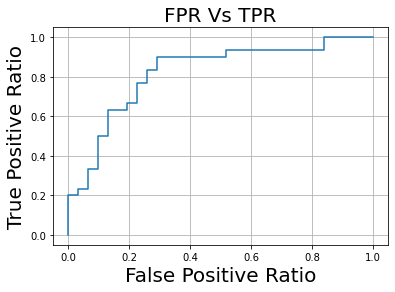

In [34]:
import matplotlib.pyplot as plt
plt.plot(fpr,tpr)
plt.xlabel("False Positive Ratio",size=20)
plt.ylabel("True Positive Ratio",size=20)
plt.title("FPR Vs TPR",size=20)
plt.grid()